# EDSR

In [2]:
import os
import matplotlib.pyplot as plt

from data import DIV2K
from model.edsr import edsr
from train import EdsrTrainer

%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [3]:
# Number of residual blocks
depth = 16

# Super-resolution factor
scale = 2

# Downgrade operator
downgrade = 'bicubic'

In [4]:
# Location of model weights (needed for demo)
weights_dir = f'weights/edsr-{depth}-x{scale}'
weights_file = os.path.join(weights_dir, 'weights.h5')

os.makedirs(weights_dir, exist_ok=True)

## Datasets

You don't need to download the DIV2K dataset as the required parts are automatically downloaded by the `DIV2K` class. By default, DIV2K images are stored in folder `.div2k` in the project's root directory.

In [11]:
div2k_train = DIV2K(scale=scale, subset='train', downgrade=downgrade)
div2k_valid = DIV2K(scale=scale, subset='valid', downgrade=downgrade)

In [12]:
train_ds = div2k_train.dataset(batch_size=8, random_transform=True)
valid_ds = div2k_valid.dataset(batch_size=1, random_transform=False, repeat_count=1)

## Training

### Pre-trained models

If you want to skip training and directly run the demo below, download [weights-edsr-16-x4.tar.gz](https://martin-krasser.de/sisr/weights-edsr-16-x4.tar.gz) and extract the archive in the project's root directory. This will create a `weights/edsr-16-x4` directory containing the weights of the pre-trained model.

In [13]:
trainer = EdsrTrainer(model=edsr(scale=scale, num_res_blocks=depth), 
                      checkpoint_dir=f'.ckpt/edsr-{depth}-x{scale}')

Model restored from checkpoint at step 1000.


In [14]:
# Train EDSR model for 300,000 steps and evaluate model
# every 1000 steps on the first 10 images of the DIV2K
# validation set. Save a checkpoint only if evaluation
# PSNR has improved.
trainer.train(train_ds,
              valid_ds.take(10),
              steps=300000, 
              evaluate_every=100, 
              save_best_only=True)

1100/300000: loss = 5.958, PSNR = 30.962103 (70.11s)
1200/300000: loss = 5.903, PSNR = 31.566763 (73.37s)
1300/300000: loss = 5.949, PSNR = 31.473888 (73.16s)
1400/300000: loss = 5.526, PSNR = 31.765270 (73.33s)
1500/300000: loss = 5.503, PSNR = 31.486872 (71.46s)
1600/300000: loss = 5.321, PSNR = 31.988367 (73.01s)
1700/300000: loss = 5.340, PSNR = 32.111622 (72.87s)
1800/300000: loss = 5.183, PSNR = 32.256378 (72.11s)
1900/300000: loss = 5.000, PSNR = 32.218761 (72.91s)
2000/300000: loss = 5.007, PSNR = 32.490204 (72.64s)
2100/300000: loss = 4.872, PSNR = 32.581341 (77.63s)
2200/300000: loss = 4.976, PSNR = 32.632160 (101.74s)
2300/300000: loss = 4.900, PSNR = 32.578693 (88.30s)
2400/300000: loss = 4.900, PSNR = 32.703102 (73.36s)
2500/300000: loss = 5.153, PSNR = 32.933712 (73.44s)
2600/300000: loss = 4.549, PSNR = 32.734863 (74.17s)
2700/300000: loss = 4.883, PSNR = 32.670185 (73.64s)
2800/300000: loss = 4.927, PSNR = 33.110786 (72.60s)
2900/300000: loss = 4.792, PSNR = 33.082092 (

16500/300000: loss = 4.036, PSNR = 34.527699 (13.91s)
16600/300000: loss = 3.880, PSNR = 34.702442 (13.86s)
16700/300000: loss = 3.980, PSNR = 34.498890 (13.87s)
16800/300000: loss = 3.660, PSNR = 34.073391 (13.87s)
16900/300000: loss = 3.928, PSNR = 33.480141 (13.96s)
17000/300000: loss = 4.077, PSNR = 34.695522 (13.95s)
17100/300000: loss = 4.015, PSNR = 34.408981 (13.90s)
17200/300000: loss = 3.960, PSNR = 34.681824 (13.97s)
17300/300000: loss = 4.005, PSNR = 34.690529 (13.98s)
17400/300000: loss = 3.818, PSNR = 34.525837 (13.94s)
17500/300000: loss = 3.742, PSNR = 34.647022 (13.88s)
17600/300000: loss = 3.883, PSNR = 34.653156 (13.93s)
17700/300000: loss = 3.804, PSNR = 34.688854 (13.93s)
17800/300000: loss = 3.804, PSNR = 34.620312 (13.95s)
17900/300000: loss = 3.899, PSNR = 33.909111 (13.87s)
18000/300000: loss = 3.905, PSNR = 34.704494 (13.92s)
18100/300000: loss = 3.890, PSNR = 34.419624 (13.36s)
18200/300000: loss = 3.902, PSNR = 34.606983 (13.97s)
18300/300000: loss = 3.987, 

31700/300000: loss = 3.746, PSNR = 34.922661 (13.85s)
31800/300000: loss = 3.705, PSNR = 34.968945 (14.01s)
31900/300000: loss = 3.619, PSNR = 34.909401 (13.39s)
32000/300000: loss = 3.639, PSNR = 34.937660 (14.16s)
32100/300000: loss = 3.546, PSNR = 34.804974 (13.90s)
32200/300000: loss = 3.693, PSNR = 34.782719 (13.86s)
32300/300000: loss = 3.716, PSNR = 34.926445 (13.95s)
32400/300000: loss = 3.774, PSNR = 34.844593 (13.97s)
32500/300000: loss = 3.782, PSNR = 34.782658 (13.88s)
32600/300000: loss = 3.544, PSNR = 34.842041 (13.95s)
32700/300000: loss = 3.774, PSNR = 34.470703 (13.81s)
32800/300000: loss = 3.759, PSNR = 34.949299 (13.97s)
32900/300000: loss = 3.796, PSNR = 34.903706 (13.99s)
33000/300000: loss = 3.725, PSNR = 34.988995 (13.95s)
33100/300000: loss = 3.782, PSNR = 34.606503 (13.55s)
33200/300000: loss = 3.688, PSNR = 34.854698 (13.95s)
33300/300000: loss = 3.713, PSNR = 34.625481 (14.07s)
33400/300000: loss = 3.792, PSNR = 34.882462 (13.93s)
33500/300000: loss = 3.617, 

46900/300000: loss = 3.583, PSNR = 35.065529 (12.07s)
47000/300000: loss = 3.607, PSNR = 35.059654 (12.12s)
47100/300000: loss = 3.648, PSNR = 34.633144 (12.13s)
47200/300000: loss = 3.584, PSNR = 34.920742 (12.09s)
47300/300000: loss = 3.748, PSNR = 35.008545 (12.10s)
47400/300000: loss = 3.490, PSNR = 35.099274 (12.07s)
47500/300000: loss = 3.556, PSNR = 34.933868 (11.60s)
47600/300000: loss = 3.396, PSNR = 35.019238 (12.06s)
47700/300000: loss = 3.733, PSNR = 34.749184 (12.01s)
47800/300000: loss = 3.661, PSNR = 35.011463 (12.03s)
47900/300000: loss = 3.750, PSNR = 34.979179 (12.04s)
48000/300000: loss = 3.496, PSNR = 35.056236 (12.04s)
48100/300000: loss = 3.652, PSNR = 35.056057 (12.01s)
48200/300000: loss = 3.613, PSNR = 34.965343 (12.03s)
48300/300000: loss = 3.665, PSNR = 35.040852 (12.03s)
48400/300000: loss = 3.332, PSNR = 34.991905 (12.05s)
48500/300000: loss = 3.667, PSNR = 34.655560 (12.02s)
48600/300000: loss = 3.780, PSNR = 34.876831 (12.10s)
48700/300000: loss = 3.611, 

62100/300000: loss = 3.468, PSNR = 35.021076 (12.22s)
62200/300000: loss = 3.549, PSNR = 35.089657 (12.25s)
62300/300000: loss = 3.545, PSNR = 35.041817 (12.31s)
62400/300000: loss = 3.586, PSNR = 35.112247 (12.29s)
62500/300000: loss = 3.590, PSNR = 35.142433 (12.27s)
62600/300000: loss = 3.598, PSNR = 34.926048 (12.27s)
62700/300000: loss = 3.507, PSNR = 34.865303 (12.26s)
62800/300000: loss = 3.592, PSNR = 35.018791 (12.28s)
62900/300000: loss = 3.570, PSNR = 35.058929 (12.26s)
63000/300000: loss = 3.633, PSNR = 34.974751 (12.25s)
63100/300000: loss = 3.715, PSNR = 35.022915 (12.24s)
63200/300000: loss = 3.648, PSNR = 35.039955 (12.24s)
63300/300000: loss = 3.662, PSNR = 35.080807 (12.26s)
63400/300000: loss = 3.641, PSNR = 35.127632 (12.24s)
63500/300000: loss = 3.443, PSNR = 34.906178 (12.30s)
63600/300000: loss = 3.643, PSNR = 35.069324 (12.28s)
63700/300000: loss = 3.596, PSNR = 35.075207 (12.26s)
63800/300000: loss = 3.705, PSNR = 35.119495 (12.25s)
63900/300000: loss = 3.584, 

77300/300000: loss = 3.407, PSNR = 35.193165 (12.30s)
77400/300000: loss = 3.710, PSNR = 35.168526 (11.83s)
77500/300000: loss = 3.452, PSNR = 34.919933 (12.32s)
77600/300000: loss = 3.617, PSNR = 35.160797 (12.28s)
77700/300000: loss = 3.557, PSNR = 34.975445 (12.30s)
77800/300000: loss = 3.604, PSNR = 35.042526 (12.31s)
77900/300000: loss = 3.658, PSNR = 35.174492 (12.32s)
78000/300000: loss = 3.573, PSNR = 35.137703 (12.28s)
78100/300000: loss = 3.639, PSNR = 35.096893 (12.32s)
78200/300000: loss = 3.683, PSNR = 35.136574 (12.30s)
78300/300000: loss = 3.541, PSNR = 35.060982 (12.28s)
78400/300000: loss = 3.601, PSNR = 35.171227 (12.30s)
78500/300000: loss = 3.479, PSNR = 35.147636 (12.32s)
78600/300000: loss = 3.611, PSNR = 35.137516 (12.32s)
78700/300000: loss = 3.657, PSNR = 35.121864 (12.29s)
78800/300000: loss = 3.566, PSNR = 35.096325 (12.40s)
78900/300000: loss = 3.393, PSNR = 35.067165 (12.33s)
79000/300000: loss = 3.750, PSNR = 34.972675 (12.34s)
79100/300000: loss = 3.726, 

92500/300000: loss = 3.631, PSNR = 35.187672 (12.28s)
92600/300000: loss = 3.386, PSNR = 35.223911 (12.28s)
92700/300000: loss = 3.478, PSNR = 35.205921 (12.27s)
92800/300000: loss = 3.461, PSNR = 35.234108 (12.27s)
92900/300000: loss = 3.342, PSNR = 35.241367 (12.26s)
93000/300000: loss = 3.682, PSNR = 35.232552 (12.22s)
93100/300000: loss = 3.495, PSNR = 35.163651 (12.22s)
93200/300000: loss = 3.495, PSNR = 35.066364 (12.20s)
93300/300000: loss = 3.657, PSNR = 35.197990 (12.22s)
93400/300000: loss = 3.589, PSNR = 35.247734 (12.30s)
93500/300000: loss = 3.552, PSNR = 34.922447 (12.36s)
93600/300000: loss = 3.592, PSNR = 35.216286 (12.25s)
93700/300000: loss = 3.502, PSNR = 35.238274 (12.22s)
93800/300000: loss = 3.600, PSNR = 35.124943 (12.24s)
93900/300000: loss = 3.573, PSNR = 35.180023 (12.23s)
94000/300000: loss = 3.602, PSNR = 35.244282 (12.27s)
94100/300000: loss = 3.589, PSNR = 35.256184 (12.26s)
94200/300000: loss = 3.551, PSNR = 35.104134 (12.25s)
94300/300000: loss = 3.784, 

107600/300000: loss = 3.522, PSNR = 35.275829 (12.29s)
107700/300000: loss = 3.361, PSNR = 35.160454 (12.27s)
107800/300000: loss = 3.500, PSNR = 35.277000 (12.26s)
107900/300000: loss = 3.532, PSNR = 35.128387 (12.21s)
108000/300000: loss = 3.263, PSNR = 35.250664 (12.30s)
108100/300000: loss = 3.517, PSNR = 35.239460 (12.35s)
108200/300000: loss = 3.593, PSNR = 35.187603 (12.31s)
108300/300000: loss = 3.646, PSNR = 35.256340 (12.27s)
108400/300000: loss = 3.625, PSNR = 35.238880 (12.26s)
108500/300000: loss = 3.433, PSNR = 35.204681 (12.24s)
108600/300000: loss = 3.512, PSNR = 35.215584 (12.27s)
108700/300000: loss = 3.524, PSNR = 35.285160 (12.31s)
108800/300000: loss = 3.566, PSNR = 35.247532 (12.29s)
108900/300000: loss = 3.459, PSNR = 35.133591 (12.32s)
109000/300000: loss = 3.600, PSNR = 35.268440 (12.31s)
109100/300000: loss = 3.591, PSNR = 35.257519 (12.29s)
109200/300000: loss = 3.504, PSNR = 35.255058 (12.35s)
109300/300000: loss = 3.698, PSNR = 35.260582 (12.29s)
109400/300

122500/300000: loss = 3.427, PSNR = 35.298073 (12.20s)
122600/300000: loss = 3.487, PSNR = 35.298073 (12.23s)
122700/300000: loss = 3.507, PSNR = 35.287102 (12.27s)
122800/300000: loss = 3.495, PSNR = 35.232952 (12.34s)
122900/300000: loss = 3.517, PSNR = 35.231598 (12.24s)
123000/300000: loss = 3.602, PSNR = 35.295807 (12.21s)
123100/300000: loss = 3.613, PSNR = 35.291615 (12.23s)
123200/300000: loss = 3.615, PSNR = 35.282482 (12.23s)
123300/300000: loss = 3.535, PSNR = 35.083046 (12.23s)
123400/300000: loss = 3.547, PSNR = 35.283150 (12.22s)
123500/300000: loss = 3.486, PSNR = 35.303516 (12.22s)
123600/300000: loss = 3.488, PSNR = 35.250595 (12.25s)
123700/300000: loss = 3.490, PSNR = 35.292347 (12.28s)
123800/300000: loss = 3.521, PSNR = 35.238331 (12.21s)
123900/300000: loss = 3.387, PSNR = 35.310272 (12.20s)
124000/300000: loss = 3.567, PSNR = 35.217724 (12.25s)
124100/300000: loss = 3.537, PSNR = 35.322834 (12.21s)
124200/300000: loss = 3.743, PSNR = 35.168907 (11.77s)
124300/300

137400/300000: loss = 3.607, PSNR = 35.267231 (12.33s)
137500/300000: loss = 3.608, PSNR = 35.283287 (12.33s)
137600/300000: loss = 3.446, PSNR = 35.216541 (12.24s)
137700/300000: loss = 3.494, PSNR = 35.263283 (12.25s)
137800/300000: loss = 3.538, PSNR = 35.324257 (12.26s)
137900/300000: loss = 3.513, PSNR = 35.181831 (12.26s)
138000/300000: loss = 3.553, PSNR = 35.259987 (12.23s)
138100/300000: loss = 3.547, PSNR = 35.299175 (12.26s)
138200/300000: loss = 3.576, PSNR = 35.309319 (12.26s)
138300/300000: loss = 3.538, PSNR = 35.279198 (12.25s)
138400/300000: loss = 3.579, PSNR = 35.224762 (12.26s)
138500/300000: loss = 3.398, PSNR = 35.306721 (12.27s)
138600/300000: loss = 3.442, PSNR = 35.320896 (12.23s)
138700/300000: loss = 3.553, PSNR = 35.144432 (12.35s)
138800/300000: loss = 3.284, PSNR = 35.310699 (12.56s)
138900/300000: loss = 3.513, PSNR = 35.316956 (12.47s)
139000/300000: loss = 3.587, PSNR = 35.289021 (12.46s)
139100/300000: loss = 3.383, PSNR = 35.357784 (12.34s)
139200/300

152300/300000: loss = 3.517, PSNR = 35.137428 (12.28s)
152400/300000: loss = 3.748, PSNR = 35.208618 (12.27s)
152500/300000: loss = 3.547, PSNR = 35.331470 (12.26s)
152600/300000: loss = 3.527, PSNR = 35.325378 (12.27s)
152700/300000: loss = 3.440, PSNR = 35.297779 (12.23s)
152800/300000: loss = 3.635, PSNR = 35.323963 (12.26s)
152900/300000: loss = 3.561, PSNR = 35.308407 (12.28s)
153000/300000: loss = 3.397, PSNR = 35.029171 (12.26s)
153100/300000: loss = 3.704, PSNR = 35.361755 (12.28s)
153200/300000: loss = 3.661, PSNR = 35.382698 (12.25s)
153300/300000: loss = 3.456, PSNR = 35.203449 (11.83s)
153400/300000: loss = 3.492, PSNR = 35.344826 (12.27s)
153500/300000: loss = 3.320, PSNR = 35.363991 (12.26s)
153600/300000: loss = 3.326, PSNR = 35.350842 (12.28s)
153700/300000: loss = 3.449, PSNR = 35.221725 (12.31s)
153800/300000: loss = 3.450, PSNR = 35.347771 (12.29s)
153900/300000: loss = 3.466, PSNR = 35.322319 (12.26s)
154000/300000: loss = 3.637, PSNR = 35.225616 (12.36s)
154100/300

167200/300000: loss = 3.503, PSNR = 35.384468 (12.29s)
167300/300000: loss = 3.462, PSNR = 35.333534 (12.26s)
167400/300000: loss = 3.510, PSNR = 35.394482 (12.29s)
167500/300000: loss = 3.494, PSNR = 35.373341 (12.27s)
167600/300000: loss = 3.547, PSNR = 35.305038 (12.26s)
167700/300000: loss = 3.533, PSNR = 35.334126 (12.26s)
167800/300000: loss = 3.589, PSNR = 35.404564 (12.28s)
167900/300000: loss = 3.422, PSNR = 35.339577 (11.87s)
168000/300000: loss = 3.614, PSNR = 35.354233 (12.31s)
168100/300000: loss = 3.435, PSNR = 35.385700 (12.41s)
168200/300000: loss = 3.582, PSNR = 35.252876 (12.55s)
168300/300000: loss = 3.542, PSNR = 35.301502 (12.34s)
168400/300000: loss = 3.551, PSNR = 35.385735 (12.31s)
168500/300000: loss = 3.396, PSNR = 35.320366 (12.39s)
168600/300000: loss = 3.594, PSNR = 35.325157 (12.29s)
168700/300000: loss = 3.689, PSNR = 35.308342 (12.37s)
168800/300000: loss = 3.447, PSNR = 35.301044 (12.33s)
168900/300000: loss = 3.279, PSNR = 35.291710 (12.34s)
169000/300

182100/300000: loss = 3.765, PSNR = 35.212013 (12.26s)
182200/300000: loss = 3.563, PSNR = 35.297211 (12.26s)
182300/300000: loss = 3.435, PSNR = 35.301983 (12.29s)
182400/300000: loss = 3.445, PSNR = 35.382915 (12.36s)
182500/300000: loss = 3.595, PSNR = 35.262543 (12.27s)
182600/300000: loss = 3.521, PSNR = 35.384014 (12.28s)
182700/300000: loss = 3.509, PSNR = 35.297443 (12.33s)
182800/300000: loss = 3.518, PSNR = 35.262634 (12.28s)
182900/300000: loss = 3.486, PSNR = 35.321838 (12.29s)
183000/300000: loss = 3.565, PSNR = 35.360119 (12.27s)
183100/300000: loss = 3.612, PSNR = 35.386627 (12.26s)
183200/300000: loss = 3.665, PSNR = 35.354515 (12.25s)
183300/300000: loss = 3.498, PSNR = 35.291653 (12.38s)
183400/300000: loss = 3.482, PSNR = 35.381172 (12.33s)
183500/300000: loss = 3.581, PSNR = 35.321659 (12.28s)
183600/300000: loss = 3.570, PSNR = 35.252083 (12.27s)
183700/300000: loss = 3.364, PSNR = 35.405346 (12.31s)
183800/300000: loss = 3.483, PSNR = 35.357281 (11.98s)
183900/300

197000/300000: loss = 3.460, PSNR = 35.403717 (12.37s)
197100/300000: loss = 3.367, PSNR = 35.368050 (12.29s)
197200/300000: loss = 3.479, PSNR = 35.379864 (12.35s)
197300/300000: loss = 3.549, PSNR = 35.337612 (12.50s)
197400/300000: loss = 3.487, PSNR = 35.285252 (12.26s)
197500/300000: loss = 3.655, PSNR = 35.368973 (12.36s)
197600/300000: loss = 3.547, PSNR = 35.297241 (12.32s)
197700/300000: loss = 3.594, PSNR = 35.391552 (12.34s)
197800/300000: loss = 3.377, PSNR = 35.411079 (12.36s)
197900/300000: loss = 3.490, PSNR = 35.407341 (12.49s)
198000/300000: loss = 3.463, PSNR = 35.351627 (13.82s)
198100/300000: loss = 3.479, PSNR = 35.375969 (13.28s)
198200/300000: loss = 3.518, PSNR = 35.403687 (12.57s)
198300/300000: loss = 3.478, PSNR = 35.415916 (12.36s)
198400/300000: loss = 3.573, PSNR = 35.290936 (12.46s)
198500/300000: loss = 3.467, PSNR = 35.385933 (12.32s)
198600/300000: loss = 3.617, PSNR = 35.317364 (12.33s)
198700/300000: loss = 3.347, PSNR = 35.360390 (12.32s)
198800/300

211900/300000: loss = 3.435, PSNR = 35.452072 (12.27s)
212000/300000: loss = 3.387, PSNR = 35.471924 (12.30s)
212100/300000: loss = 3.477, PSNR = 35.471111 (12.32s)
212200/300000: loss = 3.388, PSNR = 35.461452 (12.28s)
212300/300000: loss = 3.408, PSNR = 35.459175 (12.31s)
212400/300000: loss = 3.492, PSNR = 35.479839 (12.37s)
212500/300000: loss = 3.372, PSNR = 35.467514 (12.34s)
212600/300000: loss = 3.483, PSNR = 35.466373 (12.33s)
212700/300000: loss = 3.487, PSNR = 35.426090 (12.32s)
212800/300000: loss = 3.395, PSNR = 35.463295 (12.30s)
212900/300000: loss = 3.501, PSNR = 35.446926 (12.33s)
213000/300000: loss = 3.496, PSNR = 35.453598 (12.35s)
213100/300000: loss = 3.495, PSNR = 35.470753 (12.31s)
213200/300000: loss = 3.449, PSNR = 35.444122 (12.33s)
213300/300000: loss = 3.435, PSNR = 35.418419 (12.29s)
213400/300000: loss = 3.422, PSNR = 35.465092 (12.28s)
213500/300000: loss = 3.424, PSNR = 35.470093 (12.33s)
213600/300000: loss = 3.340, PSNR = 35.458347 (12.29s)
213700/300

226800/300000: loss = 3.416, PSNR = 35.466209 (12.29s)
226900/300000: loss = 3.359, PSNR = 35.498363 (12.31s)
227000/300000: loss = 3.472, PSNR = 35.488510 (12.35s)
227100/300000: loss = 3.405, PSNR = 35.477596 (12.53s)
227200/300000: loss = 3.376, PSNR = 35.478668 (12.28s)
227300/300000: loss = 3.342, PSNR = 35.504555 (12.26s)
227400/300000: loss = 3.294, PSNR = 35.480125 (12.29s)
227500/300000: loss = 3.472, PSNR = 35.483322 (12.25s)
227600/300000: loss = 3.461, PSNR = 35.442711 (12.33s)
227700/300000: loss = 3.512, PSNR = 35.455025 (12.19s)
227800/300000: loss = 3.304, PSNR = 35.454994 (12.28s)
227900/300000: loss = 3.423, PSNR = 35.477814 (12.26s)
228000/300000: loss = 3.539, PSNR = 35.484528 (12.27s)
228100/300000: loss = 3.362, PSNR = 35.445610 (12.23s)
228200/300000: loss = 3.364, PSNR = 35.441074 (12.21s)
228300/300000: loss = 3.410, PSNR = 35.416233 (12.25s)
228400/300000: loss = 3.341, PSNR = 35.483257 (12.23s)
228500/300000: loss = 3.446, PSNR = 35.477745 (12.21s)
228600/300

241700/300000: loss = 3.396, PSNR = 35.491257 (12.37s)
241800/300000: loss = 3.303, PSNR = 35.477821 (12.31s)
241900/300000: loss = 3.322, PSNR = 35.491096 (12.35s)
242000/300000: loss = 3.395, PSNR = 35.474937 (12.32s)
242100/300000: loss = 3.415, PSNR = 35.459045 (12.35s)
242200/300000: loss = 3.436, PSNR = 35.477283 (12.32s)
242300/300000: loss = 3.344, PSNR = 35.454731 (12.31s)
242400/300000: loss = 3.396, PSNR = 35.478516 (12.35s)
242500/300000: loss = 3.388, PSNR = 35.462330 (12.34s)
242600/300000: loss = 3.457, PSNR = 35.416931 (12.29s)
242700/300000: loss = 3.358, PSNR = 35.478477 (12.29s)
242800/300000: loss = 3.563, PSNR = 35.482708 (12.28s)
242900/300000: loss = 3.455, PSNR = 35.421371 (12.31s)
243000/300000: loss = 3.467, PSNR = 35.489399 (12.32s)
243100/300000: loss = 3.517, PSNR = 35.478214 (12.29s)
243200/300000: loss = 3.359, PSNR = 35.494816 (12.41s)
243300/300000: loss = 3.397, PSNR = 35.467113 (12.31s)
243400/300000: loss = 3.461, PSNR = 35.472588 (12.29s)
243500/300

256600/300000: loss = 3.433, PSNR = 35.486473 (12.38s)
256700/300000: loss = 3.508, PSNR = 35.499256 (12.33s)
256800/300000: loss = 3.390, PSNR = 35.489967 (12.34s)
256900/300000: loss = 3.539, PSNR = 35.503288 (12.33s)
257000/300000: loss = 3.415, PSNR = 35.450775 (12.31s)
257100/300000: loss = 3.438, PSNR = 35.406898 (12.35s)
257200/300000: loss = 3.362, PSNR = 35.484875 (12.31s)
257300/300000: loss = 3.479, PSNR = 35.499878 (12.30s)
257400/300000: loss = 3.316, PSNR = 35.480648 (12.33s)
257500/300000: loss = 3.484, PSNR = 35.465679 (12.30s)
257600/300000: loss = 3.582, PSNR = 35.465118 (12.30s)
257700/300000: loss = 3.377, PSNR = 35.486168 (12.30s)
257800/300000: loss = 3.322, PSNR = 35.486115 (12.37s)
257900/300000: loss = 3.461, PSNR = 35.478390 (12.28s)
258000/300000: loss = 3.519, PSNR = 35.483856 (12.27s)
258100/300000: loss = 3.506, PSNR = 35.504128 (12.34s)
258200/300000: loss = 3.470, PSNR = 35.450005 (12.31s)
258300/300000: loss = 3.520, PSNR = 35.483349 (12.29s)
258400/300

271500/300000: loss = 3.314, PSNR = 35.496803 (12.31s)
271600/300000: loss = 3.570, PSNR = 35.478798 (12.28s)
271700/300000: loss = 3.407, PSNR = 35.500824 (12.29s)
271800/300000: loss = 3.535, PSNR = 35.481647 (12.28s)
271900/300000: loss = 3.548, PSNR = 35.497375 (12.31s)
272000/300000: loss = 3.364, PSNR = 35.500298 (12.23s)
272100/300000: loss = 3.436, PSNR = 35.491234 (12.28s)
272200/300000: loss = 3.324, PSNR = 35.484543 (12.33s)
272300/300000: loss = 3.404, PSNR = 35.490986 (12.30s)
272400/300000: loss = 3.389, PSNR = 35.361538 (12.35s)
272500/300000: loss = 3.323, PSNR = 35.495781 (12.24s)
272600/300000: loss = 3.503, PSNR = 35.509918 (12.28s)
272700/300000: loss = 3.443, PSNR = 35.508705 (12.27s)
272800/300000: loss = 3.383, PSNR = 35.498806 (12.27s)
272900/300000: loss = 3.444, PSNR = 35.499535 (12.31s)
273000/300000: loss = 3.475, PSNR = 35.511562 (12.32s)
273100/300000: loss = 3.366, PSNR = 35.500195 (12.28s)
273200/300000: loss = 3.580, PSNR = 35.511303 (12.30s)
273300/300

286400/300000: loss = 3.378, PSNR = 35.507885 (12.90s)
286500/300000: loss = 3.336, PSNR = 35.504864 (13.08s)
286600/300000: loss = 3.580, PSNR = 35.500141 (13.02s)
286700/300000: loss = 3.390, PSNR = 35.459839 (12.79s)
286800/300000: loss = 3.369, PSNR = 35.493568 (12.89s)
286900/300000: loss = 3.525, PSNR = 35.484192 (13.29s)
287000/300000: loss = 3.382, PSNR = 35.487083 (12.73s)
287100/300000: loss = 3.454, PSNR = 35.451374 (13.10s)
287200/300000: loss = 3.657, PSNR = 35.467049 (151.26s)
287300/300000: loss = 3.434, PSNR = 35.489952 (162.43s)
287400/300000: loss = 3.459, PSNR = 35.497387 (129.33s)
287500/300000: loss = 3.323, PSNR = 35.483440 (73.63s)
287600/300000: loss = 3.404, PSNR = 35.471684 (14.37s)
287700/300000: loss = 3.368, PSNR = 35.508354 (14.03s)
287800/300000: loss = 3.335, PSNR = 35.523468 (14.15s)
287900/300000: loss = 3.402, PSNR = 35.503059 (14.00s)
288000/300000: loss = 3.398, PSNR = 35.494442 (13.98s)
288100/300000: loss = 3.363, PSNR = 35.494488 (14.02s)
288200/

In [15]:
# Restore from checkpoint with highest PSNR
trainer.restore()

Model restored from checkpoint at step 291900.


In [16]:
# Evaluate model on full validation set
psnrv = trainer.evaluate(valid_ds)
print(f'PSNR = {psnrv.numpy():3f}')

PSNR = 34.478745


In [17]:
# Save weights to separate location (needed for demo)
trainer.model.save_weights(weights_file)

## Demo

In [18]:
model = edsr(scale=scale, num_res_blocks=depth)
model.load_weights(weights_file)

In [19]:
from model import resolve_single
from utils import load_image, plot_sample
import tensorflow as tf

def resolve_and_plot(lr_image_path):
    lr = load_image(lr_image_path)
    sr = resolve_single(model, lr)
    plot_sample(lr, sr)
    
def save_output(lr_image_path):
    filename = lr_image_path.split("/")[-1].split(".")[:-1][0]
    lr = load_image(lr_image_path)
    sr = resolve_single(model, lr)
    tf.keras.preprocessing.image.save_img("output/"+filename+'_edsr.png',sr)

In [24]:
save_output('demo/raw.jpg')

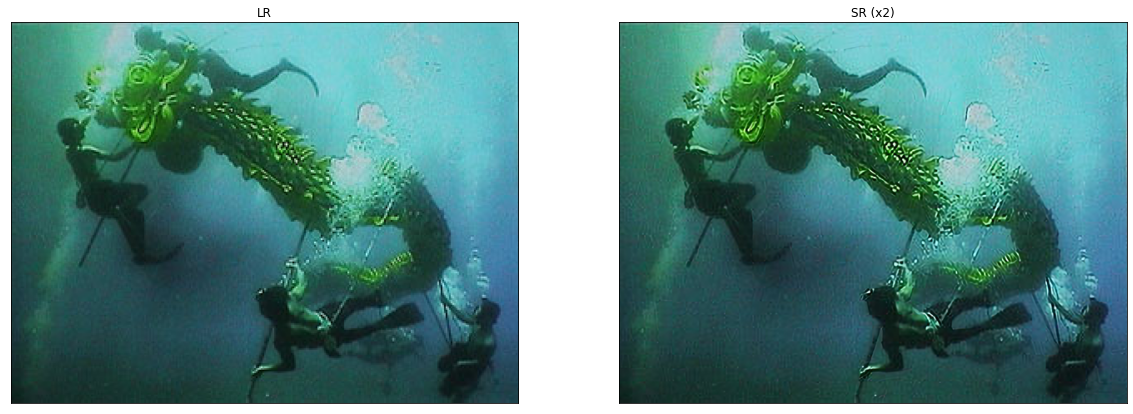

In [21]:
resolve_and_plot('demo/raw.jpg')

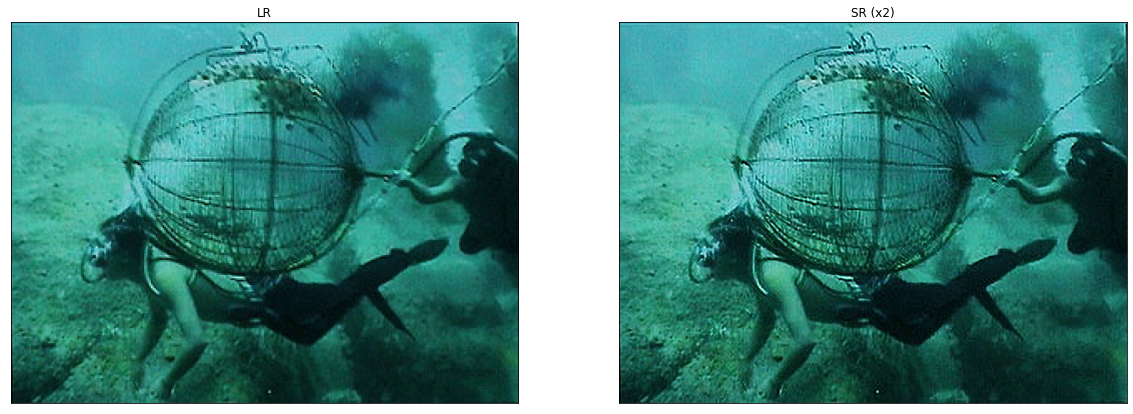

In [22]:
resolve_and_plot('demo/raw2.jpg')

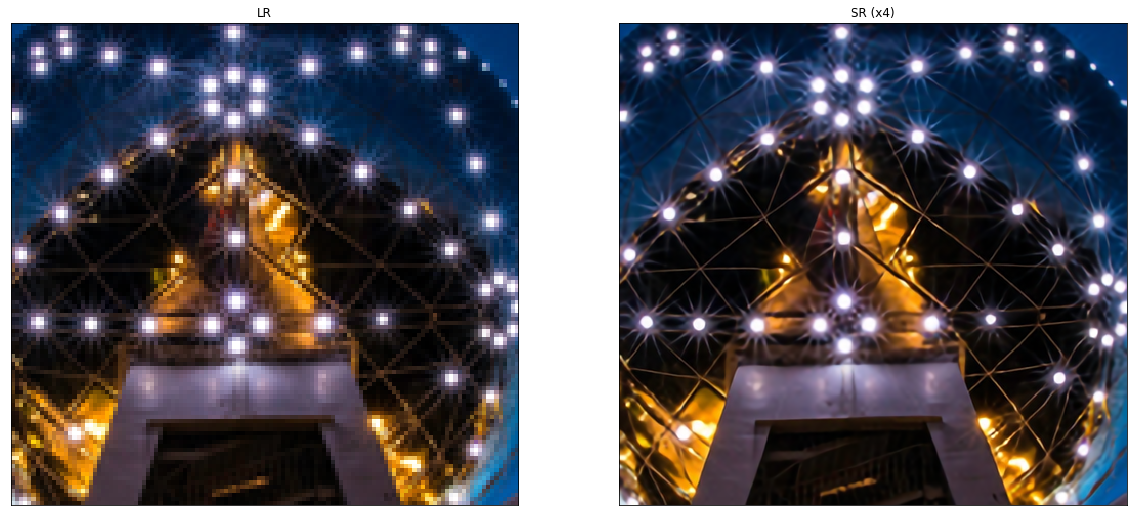

In [10]:
resolve_and_plot('demo/0851x4-crop.png')